# Single Feature Genetic Separation

In [1]:
from locator import *
from phonstats import agstats
%matplotlib inline

### Make Single Feature Sets of the 192 Features
and collect some statistics

In [27]:
singles = pd.read_pickle('feature-sets/singles.pkl')
stats = pd.DataFrame([],index=binarized.columns,
             columns=['spectal index','languages','family1 count','gen2 silhouette','gen4 silhouette'])
for g in singles:
    if g.families.B() > 1:
        gen2 = g.best_silhouette('genetic',2)[0]
    if g.families.B() > 3:
        gen4 = g.best_silhouette('genetic',4)[0]
    if gen2 and gen4:
        stats.loc[g.cols[0]] = [
            g.quality_index,
            g.numrows,
            g.families.most_common(1)[0][1],
            gen2,
            gen4
        ]

In [6]:
stats[:5]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette
1A,1.93415,563,56,0.0850393,-0.0717351
2A,1.99685,564,54,0.254236,-0.0825421
3A,2.0975,564,54,-0.00703807,-0.0675571
4A,1.86094,567,56,0.242833,-0.0650953
5A,3.59881,567,56,0.160637,-0.222041


##  Here Too, the 2-Cluster and 4-Cluster Silhouette Scores are Loosely Correlated

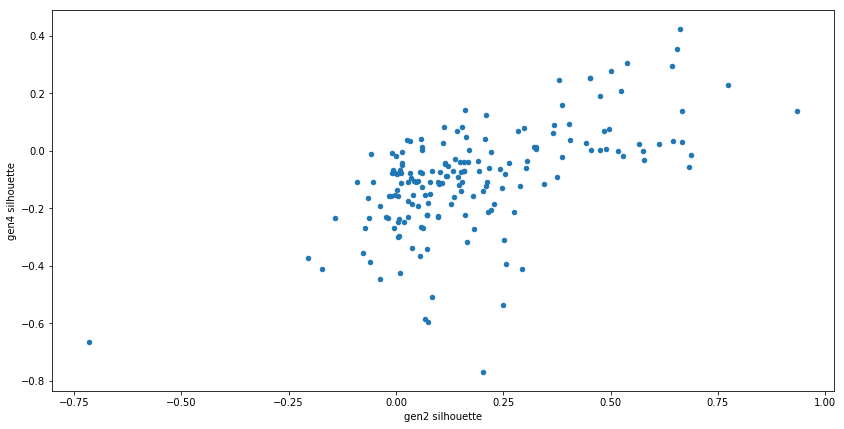

In [4]:
f = stats.loc[(stats['gen4 silhouette'] > -10) & (stats['gen2 silhouette'] > -10)]
gen2 = pd.to_numeric(f['gen2 silhouette'])
gen4 = pd.to_numeric(f['gen4 silhouette'])
d = pd.DataFrame([gen2,gen4]).T
d.plot.scatter(x='gen2 silhouette',y='gen4 silhouette',figsize=(14,7))

## And some of the scores are pretty high, both in 4 and in 2 clusters

In [7]:
stats.loc[stats['gen4 silhouette'] > 0.2].index

Index(['30A', '31A', '44A', '62A', '79A', '118A', '121A', '144V', '143D',
       '39B'],
      dtype='object')

## The Best Feature by 4-Cluster Silhouette Score

In [8]:
np.argmax(stats['gen4 silhouette'])

'30A'

In [2]:
g = ColGroup(['30A'])
g.determine_spectral_data()
print("Genetic Separation for 30A by 2 Clusters:")
g.gen_separation()

Genetic Separation for 30A by 2 Clusters:


0.66260787603384064

In [3]:
print("Four Clusters:")
g.gen_separation(4)

Four Clusters:


0.42258493709806727

In [4]:
print(g)

1 long group covering 257 languages
in mode PCA:
quality index: 2.66
PC1: 53%
PC2: 23%
fields: 'nominal_categories': 1
features:
30A Number of Genders
family1: 23 (Niger-Congo)
family2: 21 (Austronesian)



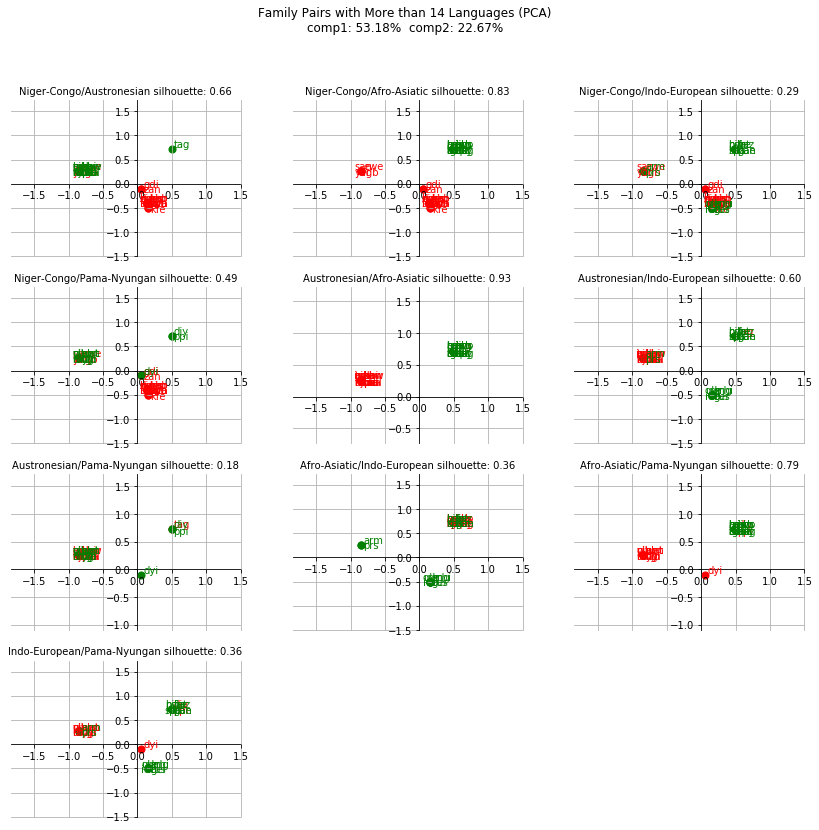

In [5]:
g.plot_multifam()

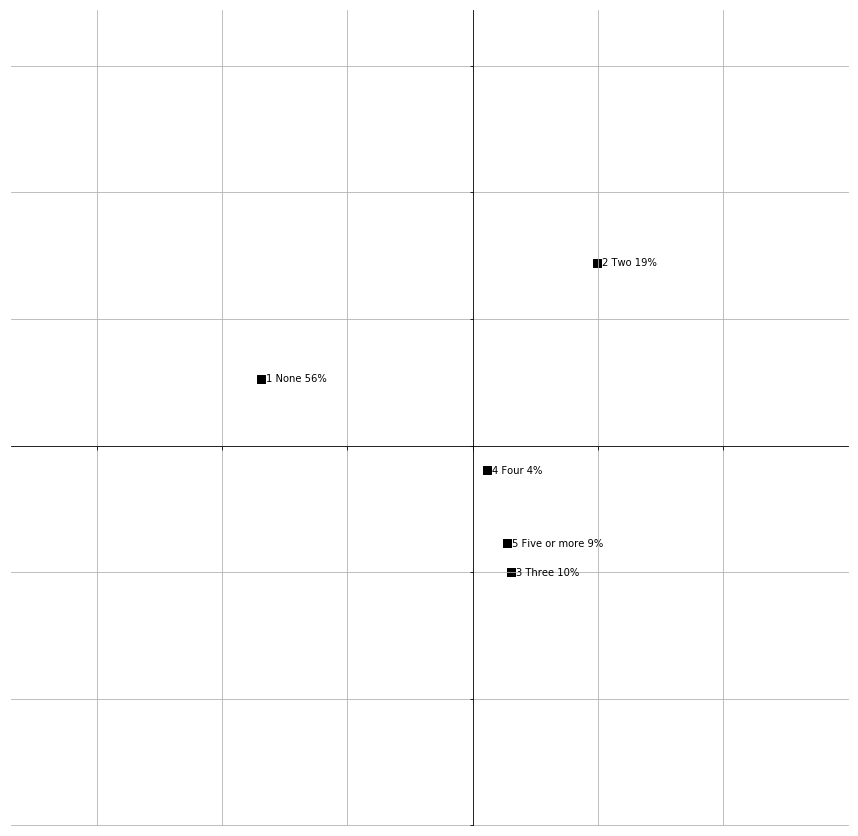

In [6]:
g.plot_vars()

So, for example, Niger-Congo Languages strangley either have 3,4,5 or no gender, but never 2 genders, while Afro-Asiatic languages always have two genders (in the 257 covered by this feature -- see top middle plot).

And likewise you can find numrous simple, single feature rules that classify families this way.

Quick Check that this is so:

In [13]:
print("Niger-Congo Values of 30A:")
print(wals.loc[(wals['family'] == 'Niger-Congo') & (wals['30A'] != '')]['30A'])

Niger-Congo Values of 30A:
196     5 Five or more
456     5 Five or more
591     5 Five or more
665             1 None
674     5 Five or more
725             4 Four
778            3 Three
904             1 None
1049           3 Three
1084    5 Five or more
1164    5 Five or more
1319    5 Five or more
1368    5 Five or more
1746    5 Five or more
1808    5 Five or more
1812    5 Five or more
2050            1 None
2091    5 Five or more
2193    5 Five or more
2201    5 Five or more
2625            1 None
2653            4 Four
2675    5 Five or more
Name: 30A, dtype: object


In [14]:
print("Afro-Asiatic Values of 30A:")
print(wals.loc[(wals['family'] == 'Afro-Asiatic') & (wals['30A'] != '')]['30A'])

Afro-Asiatic Values of 30A:
11      2 Two
34      2 Two
48      2 Two
90      2 Two
134     2 Two
158     2 Two
234     2 Two
298     2 Two
399     2 Two
593     2 Two
829     2 Two
836     2 Two
932     2 Two
1299    2 Two
1476    2 Two
1506    2 Two
1853    2 Two
1969    2 Two
2000    2 Two
2266    2 Two
Name: 30A, dtype: object


Yep.

MCA lands the category centers more squarely on the axes, separating "None" from all the others very sharply along the 1st PC.

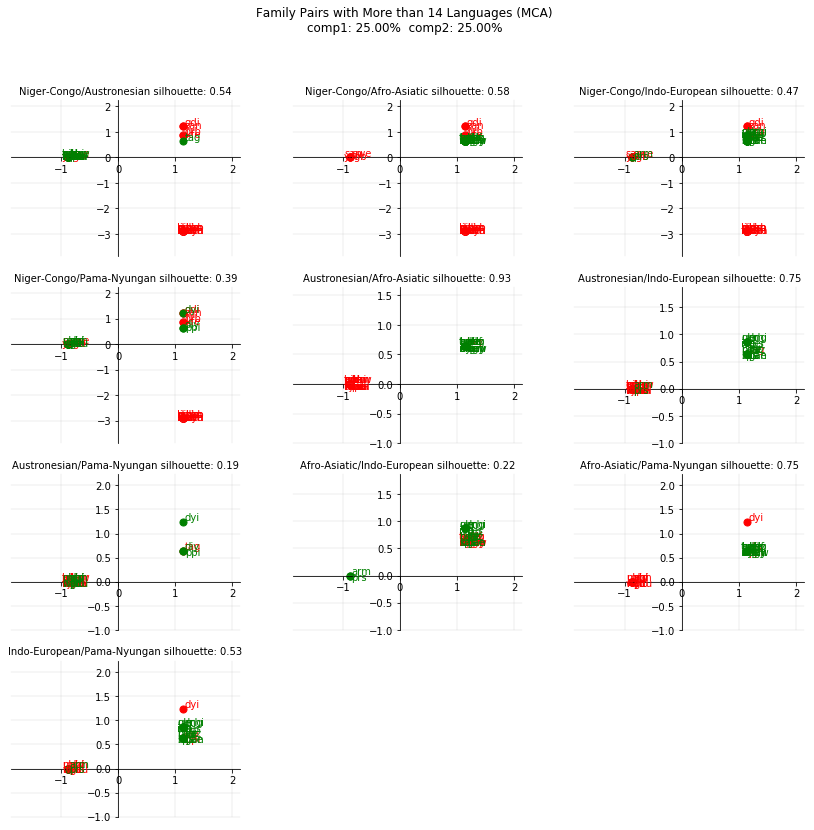

In [17]:
g.mode = 'mca'
g.plot_multifam()

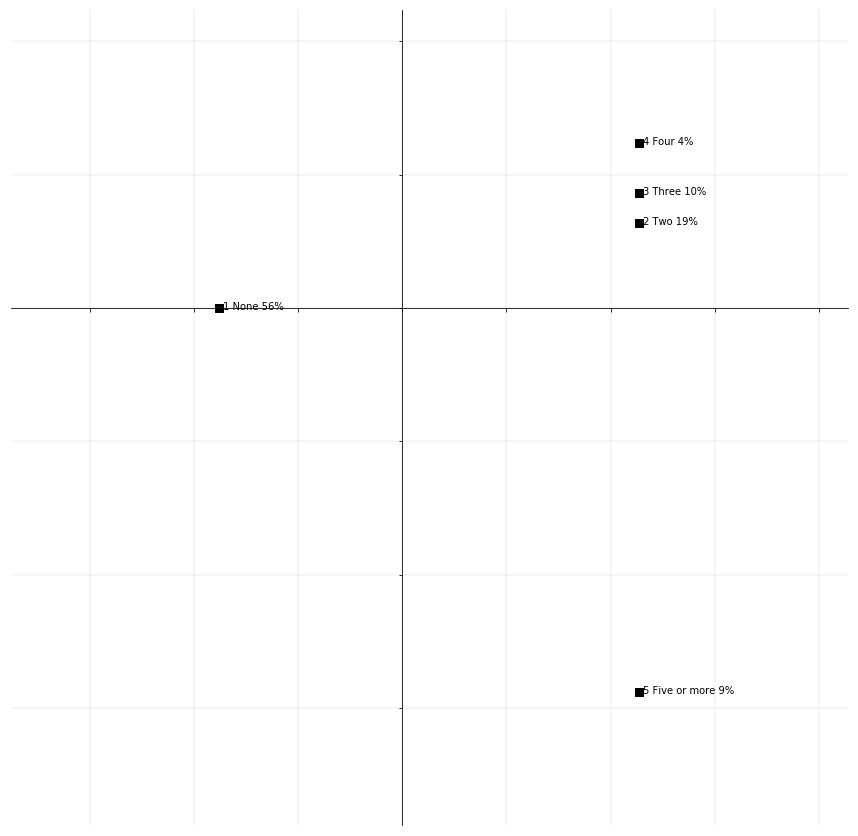

In [16]:
g.plot_vars()

Dan, what do we learn from that? I mean, this could be a miniature example for why MCA is preferable: 1st PC: None versus the rest, 2nd PC: distinction between 2,3,4 and 5 genders.


## Now,
still with 30A. Will it emerge as an important feature if we look at it's WALS area as we did for Phonology?


## Following are Results for Feature Sets only from "Nominal Categories" Covering at least 200 Languages

In [18]:
nomcats = pd.read_pickle('nominalcats-200.pkl')

In [19]:
ncstats = list()
for g in nomcats:
    g.determine_spectral_data()
    top2fams = g.families.most_common(2)
    gen2 = g.best_silhouette('genetic',2)
    gen4 = g.best_silhouette('genetic',4)
    if gen2 and gen4:
        ncstats.append({
            'spectral index' : g.quality_index,
            'gen2' : gen2[0],
            'gen2 dims' : gen2[1],
            'gen4' : gen4[0],
            'gen4 dims' : gen4[1],
            'family 1' : top2fams[0][1],
            'family 2' : top2fams[1][1]
        })
ncstats = pd.DataFrame(ncstats)

In [20]:
ncstats.describe()

,family 1,family 2,gen2,gen2 dims,gen4,gen4 dims,spectral index
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,28.808824,20.176471,0.381324,1.132353,0.116176,3.294118,5.184552
std,14.192974,8.802885,0.210409,1.402603,0.097190,4.502268,1.523825
min,16.000000,12.000000,0.064395,0.000000,-0.046319,0.000000,2.994502
25%,18.000000,15.000000,0.184582,0.000000,0.059709,0.000000,4.024580
50%,24.000000,16.000000,0.384162,1.000000,0.094096,0.500000,5.123902
75%,28.250000,20.250000,0.551073,1.000000,0.164198,5.000000,5.983781
max,72.000000,46.000000,0.802500,9.000000,0.413577,16.000000,9.749381


### Let's find the ones with good silhouette scores

In [21]:
top = [ g for g in nomcats if g.best_silhouette('genetic',2)[0] > 0.5 and g.best_silhouette('genetic',4)[0] > 0.15]

In [22]:
len(top)

13

Only 13 of them. But still...

In [23]:
loadings = agstats(top)

In [24]:
d1 = loadings.loc['component 1'][['mean_loading','std','participation']].dropna()
d1.sort_values(by='mean_loading',inplace=True,ascending=False)
d1

,mean_loading,std,participation
features,,,
31A,0.466678,0.0839198,7
50A,0.425891,0.0832408,3
49A,0.423166,0.0338685,2
32A,0.422809,0.082761,7
30A,0.380163,0.0767466,7
51A,0.204386,0.273986,6
33A,0.105461,0.114173,7
44A,0.0119494,0.00622184,2


### So 30A (and 44A) don't figure so high in the genetic separation statistics of Nominal Categories Features.

I'm not sure what to make of this.

### In the second
component 44A is very high, but 30A is even lower.

In [25]:
d2 = loadings.loc['component 2'][['mean_loading','std','participation']].dropna()
d2.sort_values(by='mean_loading',inplace=True,ascending=False)
d2

,mean_loading,std,participation
features,,,
44A,0.9308,0.00609693,2
51A,0.666507,0.396419,6
33A,0.626764,0.322626,7
50A,0.32871,0.195613,3
32A,0.111772,0.233093,7
30A,0.0674875,0.048782,7
31A,0.0630001,0.0404304,7
49A,0.035029,0.0120975,2


In [28]:
stats.sort_values(by=['gen4 silhouette','gen2 silhouette'],ascending=False,inplace=True)
stats[:5]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette
30A,2.65908,257,23,0.662608,0.422585
31A,2.23379,257,23,0.655182,0.353906
44A,3.65964,378,42,0.537198,0.305878
121A,1.97015,167,19,0.643266,0.29641
144V,4.85431,152,46,0.501939,0.276227


## So,
30A, 31A, 44A, 121A, 144V Separate Families nicely on their own, and not just betwenn two families, but between four. Maybe a set made up of these features could a genetic-separation super set. However, these feature don't cover enough languages together to make an interesting group. Besides, i'm not really sure  what we can learn from all this and were to go from here.